On any day, we get many ad impressions, which can be modeled as Poisson random variables (RV). You are told that λ is normally distributed with a mean of 100k visitors and standard deviation 2000.

In [14]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

m = np.random.normal(loc = 2,scale =3,size = 1000)
lh = np.random.uniform(low = 0, high = 10, size = 1000)

In [55]:
# Initialize click-through rate and signup rate dictionaries
ct_rate = {'low':0.01, 'high':np.random.uniform(low=0.01, high=1.2*0.01)}
su_rate = {'low':0.2, 'high':np.random.uniform(low=0.2, high=1.2*0.2)}

def get_signups(cost, ct_rate, su_rate, sims):
    lam = np.random.normal(loc=100000, scale=2000, size=sims)
    # Simulate impressions(poisson), clicks(binomial) and signups(binomial)
    impressions = np.random.poisson(lam=lam)
    clicks = np.random.binomial(impressions, p=ct_rate[cost])
    signups = np.random.binomial(clicks, p=su_rate[cost])
    return signups

print("Simulated Signups = {}".format(get_signups('high', ct_rate, su_rate, 1)))

array([101826.04487187,  98349.55252387,  98228.68478837, 100499.94889915,
        96828.16141867, 101030.92669261, 105073.61187404,  98034.88464869,
       105882.6015443 , 104333.52276793, 101275.11925102,  97222.36579331,
        97534.22153955,  98583.60166144,  95784.81000267, 101727.31842293,
        94908.32344031,  98344.62402932, 100038.79568085,  99619.98763734,
       102732.00328778, 102090.64883535, 102242.03639985, 100288.02307791,
       100664.5199681 , 102747.59596907,  99007.48897695,  98898.53906653,
       100170.40785138,  97997.6740542 ,  99261.67108335, 100820.60093318,
       101182.97419432, 100062.25147926,  99977.43581924, 100420.91818271,
       101037.21968338, 101083.55753949, 101722.98624233,  98294.61717357,
       100938.54561513,  95124.05448203, 100261.52834772, 100541.86154286,
       102346.33495026,  99927.16624927, 100112.31185119, 100016.10415521,
        97994.07603793, 102862.58207287,  99465.58809652, 102365.18481779,
        95848.61935471, 1

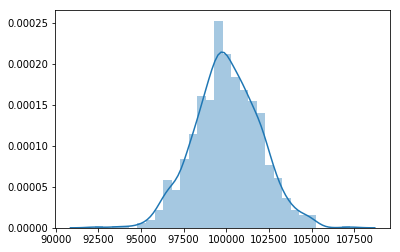

In [54]:
def get_revenue(signups):
    rev = []
    np.random.seed(123)
    for s in signups:
        # Model purchases as binomial, purchase_values as exponential
        purchases = np.random.binomial(s, p=0.1)
        purchase_values = np.random.exponential(1000,size = purchases)
        
        # Append to revenue the sum of all purchase values.
        rev.append(sum(purchase_values))
    return rev

print("Simulated Revenue = ${}".format(get_revenue(get_signups('low', ct_rate, su_rate, 1))[0]))

In [50]:
# Initialize cost_diff
sims, cost_diff = 10000, 3000

# Get revenue when the cost is 'low' and when the cost is 'high'
rev_low = get_revenue(get_signups('low', ct_rate, su_rate, sims))
rev_high = get_revenue(get_signups('high',ct_rate,su_rate,sims))

# calculate fraction of times rev_high - rev_low is less than cost_diff
frac = sum((rev_high[i] - rev_low[i]) < cost_diff for i in range(len(rev_high)))/sims
print("Probability of losing money = {}".format(frac))

array([4, 9, 2, 4, 3, 4])